In [1]:
GROUP_NR = "58"
NAMES = "Hugo Olsson, Tobias M T Ekvall"
TOPIC = "Linear Models"
DATE = "2021-12-01"

In [2]:
# INITIALIZING
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.gridspec import GridSpec

In [3]:
# _____________
# | PROBLEM 1 |
# -------------
#
# def f0(x):
#     ...

# def f1(x):
#     ...

# YOUR CODE HERE

# Functions that are used over and over

def design_matrix(x, L):
    # Creates a matrix of size len(x) and len(L) populated with zeros ; (in our case 11x2.) 
    M = np.zeros((len(x),len(L)))
    for i, j in np.ndindex(M.shape):
            M[i][j]=(L[j](x[i]))
    return M

def fit_linear_model(x, y, L):
    """Fit a linear model, defined by the list of functions L, and experimental data x and y.
    The model to be fitted is y = c[0]*L[0](x) + c[1]*L[1](x) + ... c[m]*L[m-1](x), where m is the length of L.
  
   parameters:
     x: a vector of experimental settings
     y: a vector of observed values (at each x)
     L: a list of functions, each callable with input x and returning a vector which has the same length as x
   
   returns:
     df: a pandas data frame with columns 'x', 'y', 'fit', 'residual'
     results: a dictionary with keys
       "coeffs": the fitted coefficients of the model
       "stats": a vector holding minimum, maximum, mean and standard deviation of the residual 
    """
    M = design_matrix(x, L)
    A = np.matmul(M.T,M)
    b = np.matmul(M.T,y)
    c = np.linalg.solve(A,b)
    y_fitted = np.zeros(y.shape)
    for i in range(len(L)): y_fitted += c[i]*L[i](x)
    residual = y_fitted-y
    data = {'x':x,
            'y':y,
            'fit': y_fitted,
            'residual': residual}
    df = pd.DataFrame(data)
    df['residual'] = residual
    stats = df['residual'].describe()    
    results = {'coeffs': c, 'stats': stats}
    return c, df, results


def f0(x):
    v=np.ones(x.shape)
    return v

def f1(x):
    v=x.copy()
    return v

def f2(x):
    v=x**2
    return v

def f3(x):
    v=np.sin(2*np.pi*x/P)
    return v


def f4(x):
    v=np.cos(2*np.pi*x/P)
    return v



x = np.arange(0.0, 11.0)
x_prime = np.linspace(0.0, 10.0, num=101)
L = [f0,f1]
L_prime = [f0,f1,f2]


In [4]:
# _____________
# | PROBLEM 1 |
# -------------
#
# this will test that our results have the correct length
assert (len(x) == len(f0(x)))
assert (len(x) == len(f1(x)))

In [5]:
# _____________
# | PROBLEM 2 |
# -------------
#

def noise(n, sigma=1.0, mu=0.0):
    """This function returns a vector of length n with normally distributed random values
    with a standard deviation given by sigma and a mean value given by mu."""
  
    # arr = ...      # Hint: this will use np.random.randn and the parameters n, sigma and mu which you have passed into the function
# YOUR CODE HERE

    array = sigma*np.random.randn(n) +mu # Hint: this will use np.random.randn and the parameters n, sigma and mu which you have passed into the function
    return array



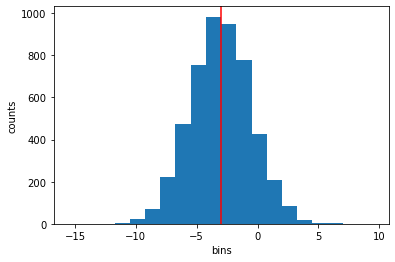

In [6]:
# _____________
# | PROBLEM 2 |
# -------------
# test case, just run
sigma = 2.5
mu = -3.0
samples = noise(5000, sigma=sigma, mu=mu)

# we make a histogram with the expected mean value marked with a red line
plt.hist(samples, bins=np.linspace(-5*sigma, 5*sigma, 21)+mu)
plt.axvline(mu, color='red')
plt.xlabel('bins')
plt.ylabel('counts')
# results for standard deviation and mean should be within 5% of specified sigma, mu
assert (abs((np.std(samples) - sigma)/sigma) < 0.05)
assert (abs((np.mean(samples) - mu)/mu) < 0.05)

In [7]:
# _____________
# | PROBLEM 2 |
# -------------
#
def measurement(x):
    epsilon = noise(len(x), 0.5, 0.0)
    y = 8*x - x**2 -3 + epsilon 
    return y

y = measurement(x)
y

array([ -3.23373534,   4.79374326,   8.6771864 ,  11.72785766,
        12.28472987,  12.85924057,   8.81799162,   3.91097751,
        -3.24192884, -10.73751936, -22.38842518])

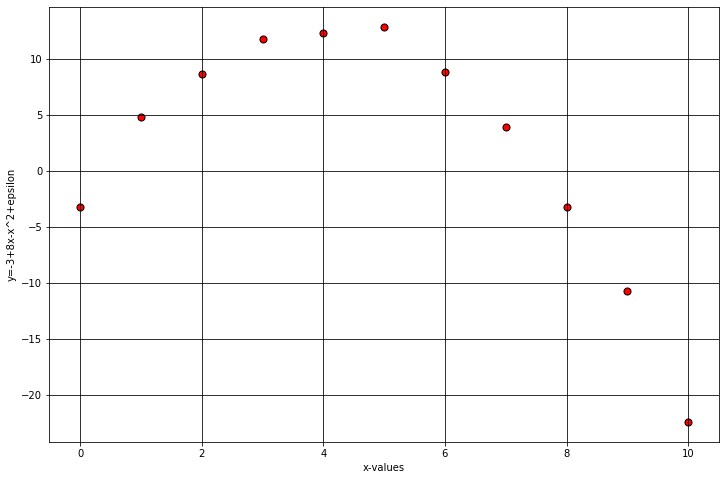

In [8]:
# _____________
# | PROBLEM 2 |
# -------------
#
# fig, ax = plt.subplots(figsize=...)
# plt.scatter(x, y, ...)
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=[12,8])
plt.scatter(x, y, s=50, color = 'r', edgecolors ='k')
plt.xlabel("x-values")
plt.ylabel("y=-3+8x-x^2+epsilon")
plt.grid(b=True, color='k')
plt.show()

In [9]:
# _____________
# | PROBLEM 3 |
# -------------
#
# YOUR CODE HERE

# test with x and list [f0, f1]
M = design_matrix(x, [f0, f1])     
assert (M.shape == (len(x), 2))

In [10]:
# _____________
# | PROBLEM 4 |
# -------------
#
# A = ...

# YOUR CODE HERE
A = np.matmul(M.T,M)

In [11]:
# _____________
# | PROBLEM 4 |
# -------------
#
# b = ...

# YOUR CODE HERE
b = np.matmul(M.T,y)

In [12]:
# _____________
# | PROBLEM 4 |
# -------------
#
print(f"A = [[{A[0,0]:8.3f},{A[0,1]:8.3f}]")
print(f"     [{A[1,0]:8.3f},{A[1,1]:8.3f}]]")
print(f"b =  [{b[0]:8.3f},{b[1]:8.3f}]")
assert (A.shape == (2,2))
assert (b.shape == (2,))

A = [[  11.000,  55.000]
     [  55.000, 385.000]]
b =  [  23.470, -95.406]


In [13]:
# _____________
# | PROBLEM 5 |
# -------------
#
# just run this cell

c = fit_linear_model(x,y,[f0,f1])[0]
print(f"our solution has {len(c)} components:")
for i in range(len(c)):
    print(f"coefficient c[{i}] = {c[i]:7.3f}")

our solution has 2 components:
coefficient c[0] =  11.804
coefficient c[1] =  -1.934


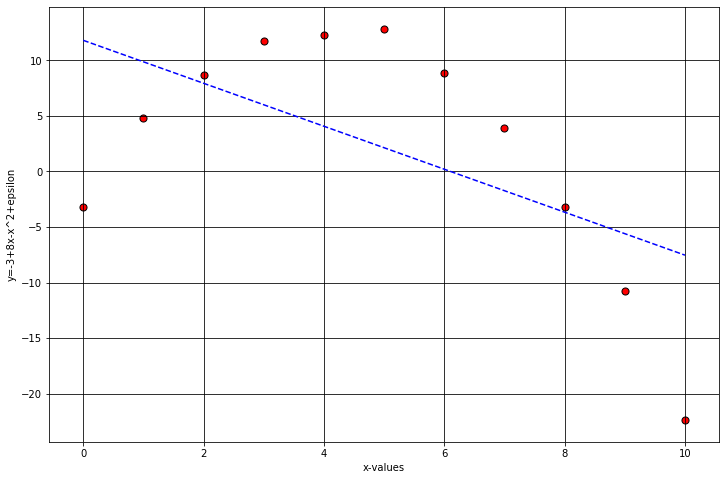

In [14]:
# _____________
# | PROBLEM 5 |
# -------------
#
# x_prime = np.linspace(...)    # create vector from 0 to 10 with a total of 101 points
# y_prime = c[0]*f0(x_prime) + c[1]*f1(x_prime)
# repeat scatter plot but add a line:
# plt.plot(x_prime, y_prime, linestyle=..., color=...)     # fill in to get a blue dashed line

# YOUR CODE HERE
x_prime = np.linspace(0.0, 10.0, num=101)
y_prime = c[0]*f0(x_prime) + c[1]*f1(x_prime)
#y_prime = fit_linear_model(x_prime, y_prime, [f0, f1])[1]
# PLOTS
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(x_prime, y_prime, linestyle='dashed', color='b')     # fill in to get a blue dashed line
plt.scatter(x, y, s=50, color = 'r', edgecolors ='k')
plt.xlabel("x-values")
plt.ylabel("y=-3+8x-x^2+epsilon")
plt.grid(b=True, color='k')
plt.show()

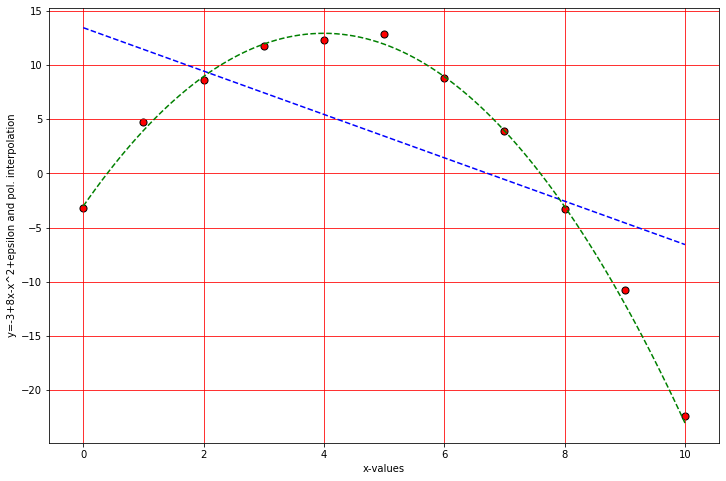

{'coeffs': array([-3.02186496,  7.98799036, -0.99908723]), 'stats': count    1.010000e+02
mean     4.517838e-15
std      4.910325e-01
min     -1.145357e+00
25%     -3.263597e-01
50%      2.933082e-02
75%      2.965648e-01
max      1.539525e+00
Name: residual, dtype: float64}


In [15]:
# _____________
# | PROBLEM 6 |
# -------------
#
#     ...
# M = design_matrix(x_prime, [f0, f1, f2])
# A = np.matmul(M.T,M)
# b_prime = np.matmul(M.T,y_prime)
# YOUR CODE HERE
y_prime = measurement(x_prime)
y_1 = fit_linear_model(x_prime, y_prime, [f0, f1])[1]
y_2 = fit_linear_model(x_prime, y_prime, [f0, f1, f2])[1]
# PLOTS
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(x_prime, y_1['fit'], linestyle = 'dashed', color='b')
plt.plot(x_prime, y_2['fit'], linestyle = 'dashed', color='g') 
plt.scatter(x, y, s=50, color = 'r', edgecolors ='k')
plt.xlabel("x-values")
plt.ylabel("y=-3+8x-x^2+epsilon and pol. interpolation")
plt.grid(b=True, color='r')
plt.show()
result = y_2 = fit_linear_model(x_prime, y_prime, [f0, f1, f2])[2]
print(result)

In [16]:
# _____________
# | PROBLEM 6 |
# -------------
#
# just run this cell to see the first 44 lines of our csv-file

# You will not have to understand exactly what is written in those lines in order to continue 
# with this exercise, but it is instructive to see how you can annotate your experimental
# data with useful information. It tells us
# * where the data come from
# * how the data were collected
# * what format they have
# * who produced the data
# * where to find reference articles

# This cell also serves as an example on how you can open a text file in Python and loop 
# though its lines, one by one.

CSV_FILE = "weekly_in_situ_co2_mlo.csv"
# open the file for reading ("r") and loop through the first 44 lines.
with open(CSV_FILE, "r") as csv:
    for i in range(44):
        line = csv.readline()
        print(line, end="")   # the text already has new line characters, no need to add one via print

"-------------------------------------------------------------------------------------------"
" Atmospheric CO2 concentrations (ppm) derived from in situ air measurements                "
" at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m      "
"                                                                                           "
" Source: R. F. Keeling, S. J. Walker, S. C. Piper and A. F. Bollenbacher                   "
" Scripps CO2 Program ( http://scrippsco2.ucsd.edu )                                        "
" Scripps Institution of Oceanography (SIO)                                                 "
" University of California                                                                  "
" La Jolla, California USA 92093-0244                                                       "
"                                                                                           "
" Status of data and correspondence:                        

In [17]:
# _____________
# | PROBLEM 6 |
# -------------
#
# just run this cell

# Read the file, skip the first 44 rows. The file contains no line with header information so we provide column names ourselves.
df = pd.read_csv(CSV_FILE, skiprows=44, header=None, names=['date','ppm'])
df

,date,ppm
0,1958-03-29,316.19
1,1958-04-05,317.31
2,1958-04-12,317.69
3,1958-04-19,317.58
4,1958-04-26,316.48
...,...,...
3237,2021-08-28,412.68
3238,2021-09-04,412.58
3239,2021-09-11,413.15
3240,2021-09-18,413.09


In [18]:
# _____________
# | PROBLEM 6 |
# -------------
#
# just run this cell

df['date'] = pd.to_datetime(df['date'])

# take the start date from the first row
epoch = df['date'][0]
# calculate the difference in days between all other dates and the epoch 
days = (df['date'] - epoch).dt.days
# Now create a new column df['days'] by simply assigning something to it.
df['days'] = days
df

,date,ppm,days
0,1958-03-29,316.19,0
1,1958-04-05,317.31,7
2,1958-04-12,317.69,14
3,1958-04-19,317.58,21
4,1958-04-26,316.48,28
...,...,...,...
3237,2021-08-28,412.68,23163
3238,2021-09-04,412.58,23170
3239,2021-09-11,413.15,23177
3240,2021-09-18,413.09,23184


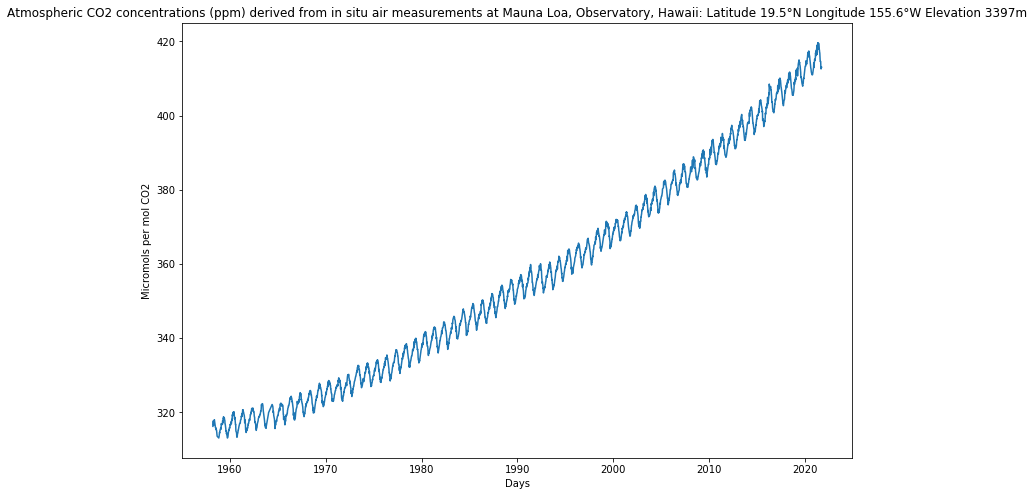

In [19]:
# _____________
# | PROBLEM 7 |
# -------------
#
# fig, ax = plt.subplots(figsize=...)
# plt.plot(df['date'], df['ppm'])
# plt.title(...)
# plt.xlabel(...)
# plt.ylabel(...)
# plt.show()

# YOUR CODE HERE
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(df['date'], df['ppm'])
plt.title("Atmospheric CO2 concentrations (ppm) derived from in situ air measurements at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m")
plt.xlabel("Days")
plt.ylabel("Micromols per mol CO2")
plt.show()


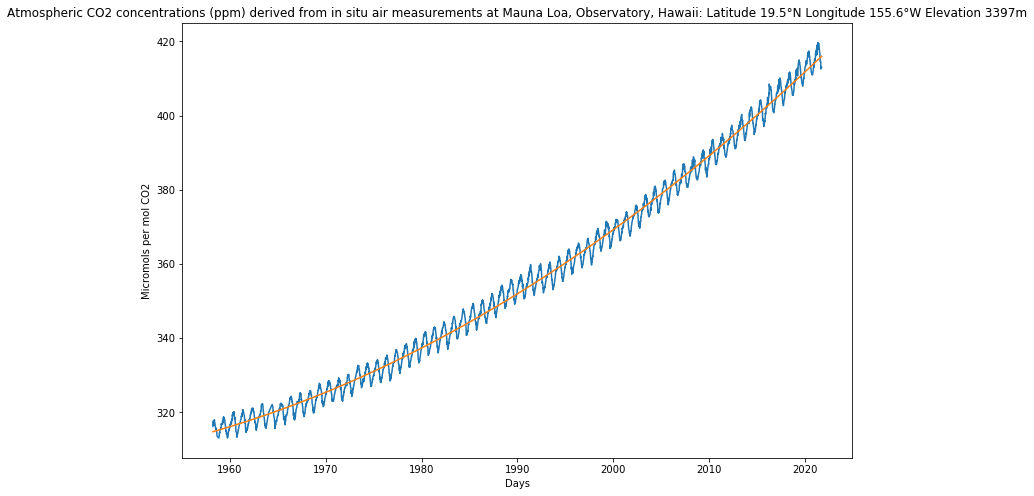

In [20]:
# _____________
# | PROBLEM 8 |
# -------------
#

x = np.array(df['days'])
y = np.array(df['ppm'])

# calculate design_matrix
# M = design_matrix(...)
# A = ...
# b = ...
# c = np.linalg.solve(A, b)
# df['fitted'] = c[0] + c[1]*x + c[2]*x*x

# plt.plot(df['date'], df['ppm'], ...)     # here you will have to pass the label for the legend
# plt.plot(df['date'], df['fitted'], ...)  # ... and here
# use the same axis labels as in problem 7
# plt.xlabel(...)
# plt.ylabel(...) 
# plt.legend()
# plt.show()

# YOUR CODE HERE
dat = fit_linear_model(x, y, [f0, f1, f2])[1]
df['fitted'] = dat['fit']
c = fit_linear_model(x, y, [f0, f1, f2])[0]
# PLOTS
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(df['date'], df['ppm'])
plt.plot(df['date'], df['fitted'])
plt.title("Atmospheric CO2 concentrations (ppm) derived from in situ air measurements at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m")
plt.xlabel("Days")
plt.ylabel("Micromols per mol CO2")
plt.show()


5.686578417869157
5.686578417869157
9.573259314620967e-14
2.2528131636035598


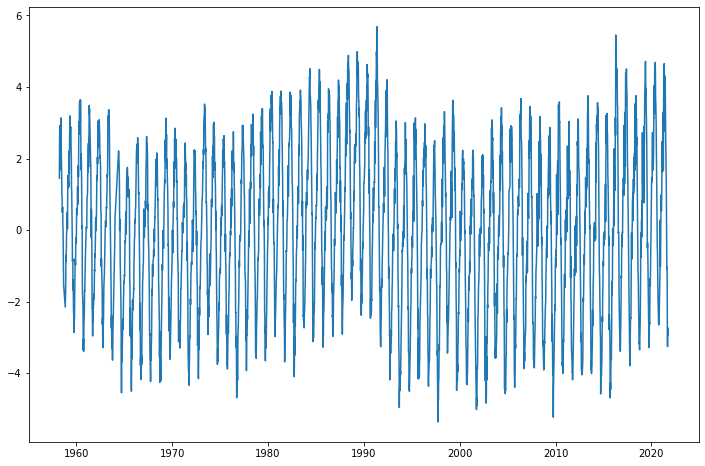

In [21]:
# _____________
# | PROBLEM 9 |
# -------------
#
# YOUR CODE HERE
residual_simple = df['ppm']-df['fitted']

# Plots
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(df['date'], residual_simple)

# Stats
print(abs(np.max(residual_simple))) 
print(np.max(residual_simple)) 
print(np.mean(residual_simple))
print(np.std(residual_simple))

In [22]:
# _____________
# | PROBLEM 9 |
# -------------
#
assert (abs(np.max(residual_simple)) < 6.0)
assert (abs(np.mean(residual_simple)) < 0.1)
assert (abs(np.std(residual_simple)) < 3.0)

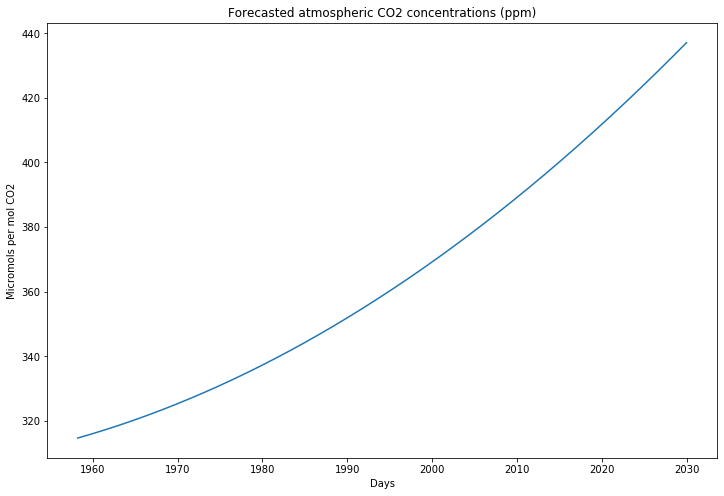

Predicted atmospheric CO2 concentration for 2029-12-31 00:00:00will be 437 ppm


In [23]:
# ______________
# | PROBLEM 10 |
# -------------
#
# evaluate your model for prediction_days
# predicted_ppm = ...
# once you have prediction_date and predicted_ppm, you can print the result with something like this:
# (If you are interested, you may look at help(datetime.strftime) to see which options you have to format a date/time string.
# Here I use %A for name of the day, %d for day in month, %B for name of month and %Y for a four digit year number.)
# print(f"predicted atmospheric CO2 concentration for {prediction_date.strftime('%A, %d %B %Y')} = {predicted_ppm} ppm")

# evaluate our model for this many days
# YOUR CODE HERE

start_of_observation = df['date'][0]              # this is the datetime object that marks the beginning of the measurements
prediction_date = datetime(2030, 1, 1)            # we want a prediction for this date
future_days = (prediction_date - df['date'].iloc[-1]).days  # calculate the difference in days

# Extension of df by creating a new dataframe called df_ext that holds predictions
added_dates = pd.date_range(df['date'][3241], periods=future_days).tolist()
ppm = [0] * future_days
dummy = pd.DataFrame({"date": added_dates,
                       "ppm": ppm})
df_ext = df.append(dummy, ignore_index=True)
df_ext['date'] = pd.to_datetime(df_ext['date'])
df_ext
start = df_ext['date'][0]
days = (df_ext['date'] - start).dt.days
df_ext['days'] = days
xx = np.array(df_ext['days'])
df_ext['predicted'] = c[0]*f0(xx) + c[1]*f1(xx) + c[2]*f2(xx)

# Plots
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(df_ext['date'], df_ext['predicted'])
plt.title("Forecasted atmospheric CO2 concentrations (ppm)")
plt.xlabel("Days")
plt.ylabel("Micromols per mol CO2")
plt.show()

print("Predicted atmospheric CO2 concentration for " + str(df_ext['date'].iloc[-1]) + "will be " +str(round(df_ext['predicted'].iloc[-1])) + " ppm" )
# Added for next cell
predicted_ppm = round(df_ext['predicted'].iloc[-1])



In [149]:
# ______________
# | PROBLEM 10 |
# --------------
#
assert (predicted_ppm > 400)

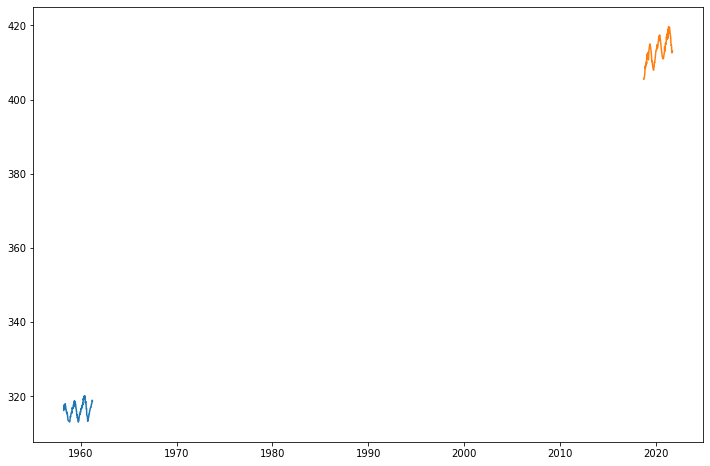

In [150]:
# ______________
# | PROBLEM 11 |
# --------------
#
# create your plot(s) in this cell
# YOUR CODE HERE
# create your plot(s) in this cell
# YOUR CODE HERE

first_three_yrs = (df['date'] <= '1961-3-29')
last_three_yrs = (df['date'] > '2018-9-25')

df4 = df.loc[first_three_yrs]
df5 = df.loc[last_three_yrs]

fig, ax = plt.subplots(figsize=[12,8])
ax.plot(df4['date'], df4['ppm'], label='1958-61')  # Plot some data on the axes.
ax.plot(df5['date'], df5['ppm'], label='2018-21')  # Plot more data on the axes...

cmap = plt.get_cmap('RdYlGn_r')

plt.show()


[3.14734350e+02 2.05037518e-03 9.97533794e-08 1.15016293e+00
 2.62762131e+00]


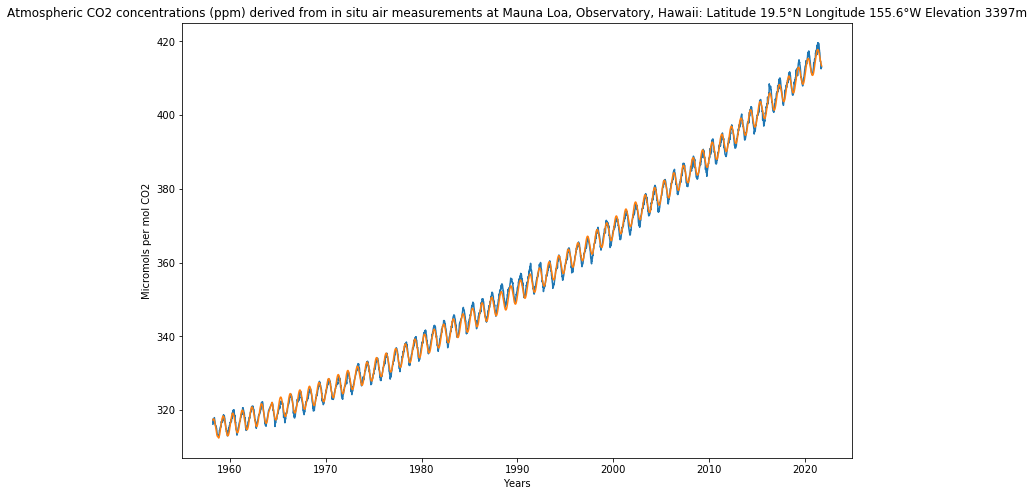

0       317.361971
1       317.495466
2       317.589190
3       317.641994
4       317.653321
           ...    
3237    414.044341
3238    413.826122
3239    413.636413
3240    413.478638
3241    413.355760
Name: seasonal, Length: 3242, dtype: float64

In [24]:
# _____________
# | PROBLEM 12 |
# -------------
#
# P = 365.25
# def f3(x):
#     ...
# 
# def f4(x):
#     ...
#
# everything else as before, but this time you will have to evaluate your model using 5 coefficients!

# YOUR CODE HERE
x_ = np.array(df['days'])
P = 365.25
df['seasonal'] = fit_linear_model(x_, y, [f0,f1,f2,f3,f4])[1]['fit']
c=fit_linear_model(x,y,[f0,f1,f2,f3,f4])[0]
print(c)
# Plots 
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(df['date'], df['ppm'])
plt.plot(df['date'], df['seasonal'])
plt.title("Atmospheric CO2 concentrations (ppm) derived from in situ air measurements at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m")
plt.xlabel("Years")
plt.ylabel("Micromols per mol CO2")
plt.show()
df['seasonal']

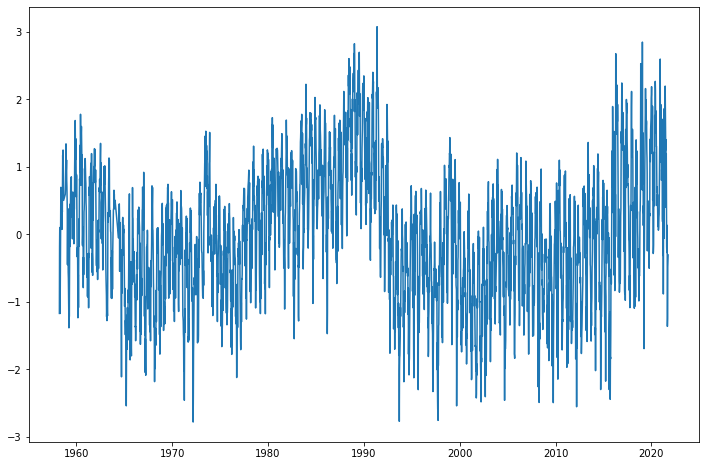

In [25]:
# _____________
# | PROBLEM 12 |
# -------------
#
# plot of the residual of the fit, i.e df['observed'] - df['fitted']

# YOUR CODE HERE
df['residual']=df['ppm']-df['seasonal']
# Plot
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(df['date'], df['residual'])


In [26]:
# _____________
# | PROBLEM 12 |
# -------------
#
# print some statistics of the residual: min, max and standard deviation, using numpy functions.

# YOUR CODE HERE
print(abs(np.max(df['residual']))) 
print(np.min(df['residual'])) 
print(np.std(df['residual']))

3.07665910849272
-2.781989153225311
0.9834010345807138


In [27]:
# _____________
# | PROBLEM 12 |
# -------------
#
assert (np.min(df['residual']) < -2)
assert (np.max(df['residual']) >  2)
assert (np.std(df['residual']) < 1.5)

In [28]:
# ______________
# | PROBLEM 12 |
# -------------
#
# just run this code.
df["residual"].describe()

count    3.242000e+03
mean    -3.897684e-14
std      9.835527e-01
min     -2.781989e+00
25%     -6.929630e-01
50%     -1.129375e-02
75%      6.632863e-01
max      3.076659e+00
Name: residual, dtype: float64

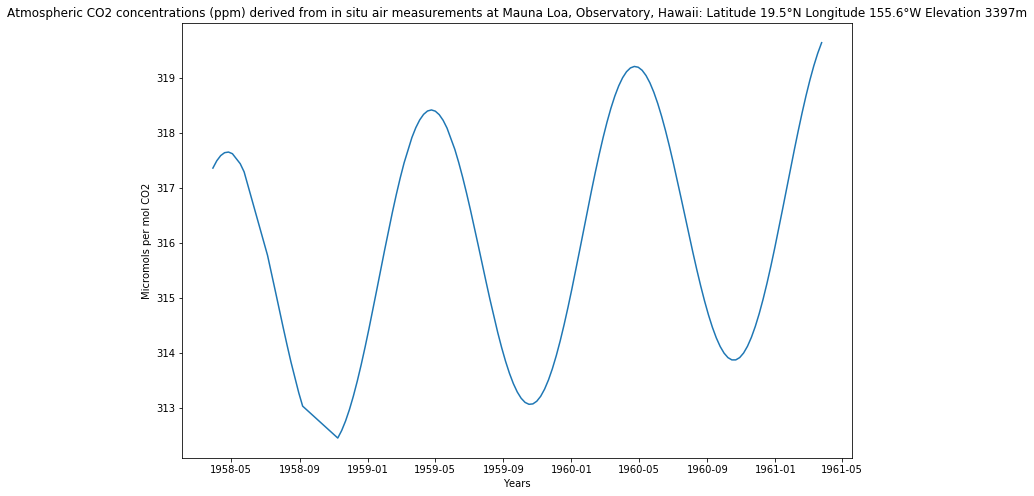

We determine the maximum to be around May 1st each year


In [30]:
# ______________
# | PROBLEM 13 |
# --------------
#
# phase = ... ?

# YOUR CODE HERE
phi = np.arctan(c[4]/c[3])
phase = (phi/(2*np.pi)*365.25)

# Estimation of maximum
# Without doing anything extra fancy, like derivation of the linear model sine component we simply blow up a few years and inspect the graph. 

years = (df['date'] <= '1961-3-29')
df_temp = df.loc[years]
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(df_temp['date'], df_temp['seasonal'])
plt.title("Atmospheric CO2 concentrations (ppm) derived from in situ air measurements at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m")
plt.xlabel("Years")
plt.ylabel("Micromols per mol CO2")
plt.show()

print("We determine the maximum to be around May 1st each year")

In [31]:
# _________________
# | PROBLEM BONUS |
# -----------------
#
assert (int(phase) == 67)

In [ ]:
# _________________
# | PROBLEM BONUS |
# -----------------
#
# See the function fit_linear_model() above

In [32]:
# _________________
# | PROBLEM BONUS |
# -----------------
#
x = np.linspace(0.0, 10.0, 10)
f0 = lambda x: x*x
f1 = lambda x: np.exp(x/2.5)
y = 2.0*f0(x) - 3.0*f1(x) + np.random.randn(len(x))

c, df, results = fit_linear_model(x, y, (f0, f1))
print(df)
print(results)

           x          y        fit  residual
0   0.000000  -3.152501  -2.941905  0.210596
1   1.111111  -3.841506  -2.150320  1.691186
2   2.222222   3.862025   2.595810 -1.266215
3   3.333333  11.106646  10.780881 -0.325765
4   4.444444  21.619078  21.600745 -0.018333
5   5.555556  33.131256  33.801234  0.669978
6   6.666667  46.663928  45.426316 -1.237612
7   7.777778  52.908414  53.425319  0.516906
8   8.888889  52.485222  53.040345  0.555123
9  10.000000  37.177438  36.850861 -0.326578
{'coeffs': array([ 1.97473411, -2.94190463]), 'stats': count    10.000000
mean      0.046929
std       0.897822
min      -1.266215
25%      -0.326375
50%       0.096132
75%       0.545569
max       1.691186
Name: residual, dtype: float64}
